<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
# Okay, but why take away our awesome magic python functions?!?!?!
# Fine...first let's lay out the data
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# We know what n is
sales_n = 7

# We'll find the sum first
def summing(data):
  total=0
  for i in data:
    total += i
  return total
  
sales_sum = summing(sales)

# mean is sum over n
sales_mean = sales_sum / sales_n

sales_n, sales_sum, sales_mean

(7, 21369, 3052.714285714286)

In [3]:
# Now let's find the variance
# We need the sum, of the squares, of the mean differences

def variance(data):
  sqtotal=0
  for i in data:
    sqtotal += ((i - sales_mean)**2)
  return sqtotal/(sales_n - 1)

sales_var = variance(sales)

# Std. Deviation is the sqare root of variance

sales_stdev = sales_var**0.5

sales_n, sales_sum, sales_mean, sales_var, sales_stdev

(7, 21369, 3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
# Let's lay out the number of customers
num_cust = [127, 80, 105, 92, 120, 115, 93]

# Now let's find the covariance
# First we need to make a dataframe

storedata = {"sales": sales, "customer numbers": num_cust}

df = pd.DataFrame(storedata)
df

,sales,customer numbers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
# Now we can use the Covariance function
Covariance = df.cov()
# Covariance = 7604.357143

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [6]:
cov_custsales = Covariance.iat[0,1]
cov_custsales

7604.357142857142

In [7]:
# We can use the functions and methods we used previously

cust_n = len(num_cust)
cust_sum = summing(num_cust)
cust_mean = cust_sum/cust_n

def variance(data):
  sqtotal=0
  for i in data:
    sqtotal += ((i - cust_mean)**2)
  return sqtotal/(cust_n - 1)
cust_var = variance(num_cust)
cust_stdev = cust_var**0.5

# With this info we can find the correlation
corr_custsales = cov_custsales/(cust_stdev * sales_stdev)
cust_mean, cust_var, cust_stdev, corr_custsales


(104.57142857142857,
 290.95238095238096,
 17.057326313123664,
 0.9628339778148909)

In [8]:
# Let's double check
df.corr()

,sales,customer numbers
sales,1.000000,0.962834
customer numbers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [9]:
dft = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
dft.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [10]:
# Ok, let's get rid of the useless index column
dft = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)
dft.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [11]:
# We need our data to be clean
dft.isna().sum()


pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [12]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1310 entries, 1 to 1310
Data columns (total 15 columns):
pclass              1309 non-null float64
survived            1309 non-null float64
name                1309 non-null object
sex                 1309 non-null object
age                 1310 non-null float64
sibsp               1309 non-null float64
parch               1309 non-null float64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1310 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
has_cabin_number    1310 non-null int64
dtypes: float64(7), int64(1), object(7)
memory usage: 163.8+ KB


In [13]:
dft.describe()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [14]:
# We want only the numeric columns
titanic = dft[["pclass","survived", "age", "sibsp", "parch", "fare", "body", "has_cabin_number"]]
titanic.head()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [15]:
# First the Covariance
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [16]:
# Now the Corelation
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

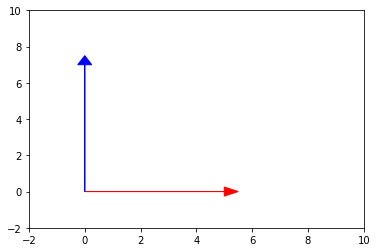

In [17]:
# Ok, let's plot 2 PERPENDICULAR vectors
# First the vectors
a = [5, 0]
b = [0, 7]

# Now we plot
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.arrow(0, 0, a[0], a[1], head_width=.5, head_length=.5, color='red')
plt.arrow(0, 0, b[0], b[1], head_width=.5, head_length=.5, color='blue')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [18]:
# To find out if vectors are orthogonal we must use dot product
# First the Vectors
a = [-5,3,7]
b = [6,-8,2]

# Now Dot Product
adotb = np.dot(a,b)

# Now let's test for orthogonality
if adotb == 0:
  print("a and b are Orthogonal because their dot product zero")
else: print("a and b are NOT Orthogonal because their dot product is non-zero")

a and b are NOT Orthogonal because their dot product is non-zero


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [19]:
# Let's get our vector
c = [2, -15, 6, 20]

# Part 1
norm_c = np.linalg.norm(c)
norm_c_sq = norm_c**2
norm_c_sq

665.0

In [20]:
# Part 2
cdotc = np.dot(c,c)
cdotc

665

In [21]:
# Part 3
c = np.array([2, -15, 6, 20])
cxc = np.matmul(c.T, c)
cxc

665

In [0]:
# All these values are the equal
# And they were all calculated the same way

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix}1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j} \end{align} 
\begin{align} e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k} \end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
# First we need the norm of vector f
f = [4, 12, 11, 9, 2]

norm_f = np.linalg.norm(f)
norm_f

19.131126469708992

In [24]:
# f_hat will be our unit vector
f_hat = f / norm_f

print(f_hat)


[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

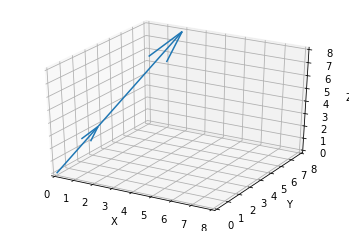

In [29]:
# First Let's plot the dependent vectors, and we'll do it in R3
# Linearly dependent vectors lie on the same line and are multiples
a = [1, 2, 3]
b = [2, 4, 6]

# Now let's plot
# For simplicity we'll have b start at the end of a
vec_a = np.array([0, 0, 0, 1, 2, 3])
vec_b = np.array([1, 2, 3, 2, 4, 6])
X, Y, Z, U, V, W = zip(vec_a, vec_b)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


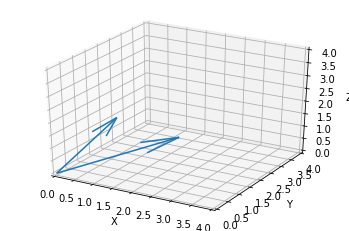

In [30]:
# Next, we'll plot the linearly independent vectors
# This will be easy, linearly indements vectors don't lie on the same line
c = [1, 1, 2]
d = [2, 2, 1]

# Now let's plot
vec_c = np.array([0, 0, 0, 1, 1, 2])
vec_d = np.array([0, 0, 0, 2, 2, 1])
X, Y, Z, U, V, W = zip(vec_c, vec_d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1,)
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [35]:
gh = np.array([[1, 2],
               [4, 8]])
np.linalg.det(gh)
# The Determinant of the matrix of these vectors is 0
# These vectors are linearly dependent
# The span of these vectors is the line they lie on

0.0

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [36]:
lmn = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.det(lmn)

# These vectors are all linearly independent of one another
# The Determinant of the matrix of these vectors in non-zero
# These vectors are linearly independent
# The span of these vectors is R3

-19.999999999999996

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
# If we want 2 vectors that form the basis for R2, the Unit vectors are perfect
i = [1, 0]
j = [0, 1]

## 6.2 What does it mean to form a basis?

To form a basis of a vector space is to be a set of vectors that are both **linearly independent**, and **span** that vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [38]:
# We see that P is the same as lmn which we have already described
P = lmn
np.linalg.det(P)

# Because we know that the 3 vectors that make up P are Linearly independent,
# we know that P spans the R3 space
# This means the P is Rank 3

-19.999999999999996

## 7.2 What does the rank of a matrix tell us?

The Rank of a matrix tells us the **dimension** of the vector space **spanned** by it's columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [46]:
# We can find the projected vector by using the formula given in lecture
# We need to find the scalar coefficient
v = [1, 3]
w = [-1, 2]
# We need two dot products
wdotv = np.dot(w,v)
vdotv = np.dot(v,v)
print(wdotv, vdotv, wdotv/vdotv)

5 10 0.5


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


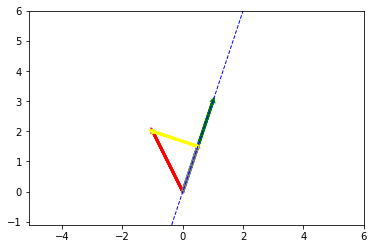

In [52]:
# First our vectors
v = [1, 3]
w = [-1, 2]
proj = np.multiply(0.5,v)
minus_proj = w-proj

# Next, we set up our plot
plt.xlim(-5.1, 6)
plt.ylim(-1.1, 6)

# Now we set our axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Now we get the values for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Now we plot the vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length = .05, color = 'green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length = .05, color = 'red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length =.05, color = 'gray')
plt.arrow(proj[0], proj[1], minus_proj[0], minus_proj[1], linewidth=3, head_width=.05, head_length=.05, color= 'yellow')

plt.show()



In [53]:
# Let's check for orthogonality
np.dot(proj, minus_proj)
# Checked!

0.0

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

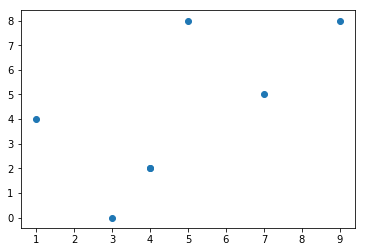

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()